Aim of this notebook is to explore one of the Explainable AI Methods called **"Partial Dependence Plots"** on kickstarter crowdfunding project dataset. Link to the dataset is https://www.kaggle.com/datasets/kemical/kickstarter-projects

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
## load required libraries 
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from collections import Counter
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DBA5102XAI/ks-projects-201801.csv',parse_dates = ["launched", "deadline"])

In [ ]:
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [ ]:
df_value_counts = pd.DataFrame(df.category.value_counts())

In [ ]:
df_value_counts

,category
Product Design,22314
Documentary,16139
Music,15727
Tabletop Games,14180
Shorts,12357
...,...
Residencies,69
Letterpress,49
Chiptune,35
Literary Spaces,27


In [ ]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [ ]:
print ("Total Projects: ", df.shape[0], "\nTotal Features: ", df.shape[1])
df.head()

Total Projects:  378661 
Total Features:  15


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
df = df.dropna()
# only select rows with currency as USD
df = df[df["currency"] == "USD"]
# only select rows where state is either "failed" or "successful"
df = df[df["state"].isin(["failed", "successful"])]
# only select few columns
df = df.drop(["backers", "ID", "currency", "country", "pledged", "usd pledged", "usd_pledged_real", "usd_goal_real"], axis = 1)

In [ ]:
df.groupby("main_category").agg({"goal" : "mean", "category" : "sum"})

,goal,category
main_category,,
Art,32272.190708,Public ArtIllustrationPublic ArtArtArtArtPubli...
Comics,23004.937896,Comic BooksComicsComicsComicsComicsComic Books...
Crafts,10445.886467,CraftsCraftsKnittingDIYCraftsCraftsCraftsDIYWo...
Dance,8175.985167,DanceDancePerformancesPerformancesPerformances...
Design,39184.820769,DesignProduct DesignProduct DesignProduct Desi...
Fashion,22597.240496,FashionReady-to-wearFashionFashionApparelAppar...
Film & Video,72268.329369,Narrative FilmNarrative FilmAnimationWebseries...
Food,34349.927259,RestaurantsFoodDrinksFoodRestaurantsFood Truck...
Games,43053.645051,GamesTabletop GamesTabletop GamesTabletop Game...


In [ ]:
def syllable_count(word):
    word = word.lower()
    vowels = "aeiouy"
    count = 0
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

In [ ]:
## feature engineering
df["syllable_count"]   = df["name"].apply(lambda x: syllable_count(x))
df["launched_month"]   = df["launched"].dt.month
df["launched_week"]    = df["launched"].dt.week
df["launched_day"]     = df["launched"].dt.weekday
df["is_weekend"]       = df["launched_day"].apply(lambda x: 1 if x > 4 else 0)
df["num_words"]        = df["name"].apply(lambda x: len(x.split()))
df["num_chars"]        = df["name"].apply(lambda x: len(x.replace(" ","")))
df["duration"]         = df["deadline"] - df["launched"]
df["duration"]         = df["duration"].apply(lambda x: int(str(x).split()[0]))
df["state"]            = df["state"].apply(lambda x: 1 if x=="successful" else 0)

## label encoding the categorical features
df = pd.concat([df, pd.get_dummies(df["main_category"])], axis = 1)
le = LabelEncoder()
for c in ["category", "main_category"]:
    df[c] = le.fit_transform(df[c])

In [ ]:
## Generate Count Features related to Category and Main Category
t2 = df.groupby("main_category").agg({"goal" : "mean", "category" : "sum"})
t1 = df.groupby("category").agg({"goal" : "mean", "main_category" : "sum"})
t2 = t2.reset_index().rename(columns={"goal" : "mean_main_category_goal", "category" : "main_category_count"})
t1 = t1.reset_index().rename(columns={"goal" : "mean_category_goal", "main_category" : "category_count"})
df = df.merge(t1, on = "category")
df = df.merge(t2, on = "main_category")

df["diff_mean_category_goal"] = df["mean_category_goal"] - df["goal"]
df["diff_mean_category_goal"] = df["mean_main_category_goal"] - df["goal"]

df = df.drop(["launched", "deadline"], axis = 1)
df[[c for c in df.columns if c != "name"]].head()

,category,main_category,goal,state,syllable_count,launched_month,launched_week,launched_day,is_weekend,num_words,...,Music,Photography,Publishing,Technology,Theater,mean_category_goal,category_count,mean_main_category_goal,main_category_count,diff_mean_category_goal
0,93,6,30000.0,0,11,9,35,5,1,8,...,0,0,0,0,0,57623.76924,25506,72268.329369,3678111,42268.329369
1,93,6,45000.0,0,4,1,2,5,1,3,...,0,0,0,0,0,57623.76924,25506,72268.329369,3678111,27268.329369
2,93,6,8000.0,1,5,1,4,3,0,4,...,0,0,0,0,0,57623.76924,25506,72268.329369,3678111,64268.329369
3,93,6,60000.0,1,14,1,2,5,1,10,...,0,0,0,0,0,57623.76924,25506,72268.329369,3678111,12268.329369
4,93,6,50000.0,0,8,1,3,5,1,5,...,0,0,0,0,0,57623.76924,25506,72268.329369,3678111,22268.329369


In [ ]:
df.columns

Index(['name', 'category', 'main_category', 'goal', 'state', 'syllable_count',
       'launched_month', 'launched_week', 'launched_day', 'is_weekend',
       'num_words', 'num_chars', 'duration', 'Art', 'Comics', 'Crafts',
       'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games',
       'Journalism', 'Music', 'Photography', 'Publishing', 'Technology',
       'Theater', 'mean_category_goal', 'category_count',
       'mean_main_category_goal', 'main_category_count',
       'diff_mean_category_goal'],
      dtype='object')

In [ ]:
df

,name,category,main_category,goal,state,syllable_count,launched_month,launched_week,launched_day,is_weekend,...,Music,Photography,Publishing,Technology,Theater,mean_category_goal,category_count,mean_main_category_goal,main_category_count,diff_mean_category_goal
0,Greeting From Earth: ZGAC Arts Capsule For ET,93,6,30000.0,0,11,9,35,5,1,...,0,0,0,0,0,57623.769240,25506,72268.329369,3678111,42268.329369
1,Where is Hank?,93,6,45000.0,0,4,1,2,5,1,...,0,0,0,0,0,57623.769240,25506,72268.329369,3678111,27268.329369
2,Star and the Snowman,93,6,8000.0,1,5,1,4,3,0,...,0,0,0,0,0,57623.769240,25506,72268.329369,3678111,64268.329369
3,I'LL SEE YOU IN MY DREAMS - narrative feature ...,93,6,60000.0,1,14,1,2,5,1,...,0,0,0,0,0,57623.769240,25506,72268.329369,3678111,12268.329369
4,The Gentle Art Of Tutelage,93,6,50000.0,0,8,1,3,5,1,...,0,0,0,0,0,57623.769240,25506,72268.329369,3678111,22268.329369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261353,MOTION 2014 Summer Choreographic Residency,122,3,5000.0,1,12,10,42,4,0,...,0,0,0,0,0,4985.883721,129,8175.985167,189584,3175.985167
261354,Help PEARSONWIDRIG DANCETHEATER go to Cuba!,122,3,10000.0,1,13,11,48,6,1,...,0,0,0,0,0,4985.883721,129,8175.985167,189584,-1824.014833
261355,The Friendship Club,122,3,3000.0,1,4,8,32,0,0,...,0,0,0,0,0,4985.883721,129,8175.985167,189584,5175.985167
261356,Lxs Desaparecidxs,122,3,3000.0,1,5,7,28,1,0,...,0,0,0,0,0,4985.883721,129,8175.985167,189584,5175.985167


In [ ]:
## define predictors and label 
label = df.state
features = [c for c in df.columns if c not in ["state", "name"]]

## prepare training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(df[features], label, test_size = 0.025, random_state = 2)
X_train1, y_train1 = X_train, y_train
X_test1, y_test1 = X_test, y_test

In [ ]:
X_test1

,category,main_category,goal,syllable_count,launched_month,launched_week,launched_day,is_weekend,num_words,num_chars,...,Music,Photography,Publishing,Technology,Theater,mean_category_goal,category_count,mean_main_category_goal,main_category_count,diff_mean_category_goal
11739,39,6,12000.0,18,3,12,0,0,8,48,...,0,0,0,0,0,52066.487732,74094,72268.329369,3678111,60268.329369
239454,61,13,50000.0,8,3,12,2,0,5,27,...,0,0,0,1,0,53153.572226,20969,98820.162404,1621032,48820.162404
186679,82,12,2000.0,15,9,38,3,0,8,42,...,0,0,1,0,0,8156.428571,2268,18567.652272,1959123,16567.652272
65861,125,10,15000.0,5,10,44,0,0,5,17,...,1,0,0,0,0,7089.999710,56500,14292.655761,3315664,-707.344239
37254,129,6,2000.0,5,8,31,0,0,2,15,...,0,0,0,0,0,23987.944760,57204,72268.329369,3678111,70268.329369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149378,144,4,2000.0,15,8,34,2,0,9,44,...,0,0,0,0,0,19857.354839,248,39184.820769,1763149,37184.820769
148551,65,4,100.0,18,3,13,4,0,9,51,...,0,0,0,0,0,7128.292953,5052,39184.820769,1763149,39084.820769
141936,113,4,50000.0,16,8,35,1,0,11,43,...,0,0,0,0,0,30704.818593,54928,39184.820769,1763149,-10815.179231
187733,52,5,6500.0,13,4,15,2,0,6,47,...,0,0,0,0,0,12769.814965,30755,22597.240496,505146,16097.240496


In [ ]:
X_train1

,category,main_category,goal,syllable_count,launched_month,launched_week,launched_day,is_weekend,num_words,num_chars,...,Music,Photography,Publishing,Technology,Theater,mean_category_goal,category_count,mean_main_category_goal,main_category_count,diff_mean_category_goal
35636,129,6,15000.0,7,1,4,5,1,5,24,...,0,0,0,0,0,23987.944760,57204,72268.329369,3678111,57268.329369
4608,5,6,11000.0,10,8,33,2,0,6,30,...,0,0,0,0,0,105029.980492,10734,72268.329369,3678111,61268.329369
171477,115,12,8600.0,12,6,25,3,0,7,33,...,0,0,1,0,0,23210.236270,46164,18567.652272,1959123,9967.652272
102524,134,7,3000.0,15,4,15,1,0,10,48,...,0,0,0,0,0,63425.919658,4523,34349.927259,1261912,31349.927259
164478,54,12,950.0,13,1,1,2,0,8,39,...,0,0,1,0,0,22314.153914,82044,18567.652272,1959123,17617.652272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175638,19,12,3000.0,10,4,15,1,0,6,35,...,0,0,1,0,0,9606.131817,62004,18567.652272,1959123,15567.652272
95816,58,7,5000.0,7,10,43,0,0,4,23,...,0,0,0,0,0,22050.616478,61796,34349.927259,1261912,29349.927259
203245,141,14,50000.0,4,5,22,2,0,3,12,...,0,0,0,0,1,12613.911483,82306,23231.680572,1031221,-26768.319428
100879,59,7,170000.0,11,3,12,4,0,5,36,...,0,0,0,0,0,27148.538806,9380,34349.927259,1261912,-135650.072741


In [ ]:
## train a random forest classifier 
model1 = RandomForestClassifier(n_estimators=50, random_state=0).fit(X_train1, y_train1)
y_pred = model1.predict(X_test1)

In [ ]:
# pip install pdpbox

In [ ]:
from pdpbox import pdp
cols_of_interest = ['num_words', 'num_chars', 'syllable_count',
                    'duration', 'launched_month', 'launched_day',
                    'category_count', 'main_category_count']

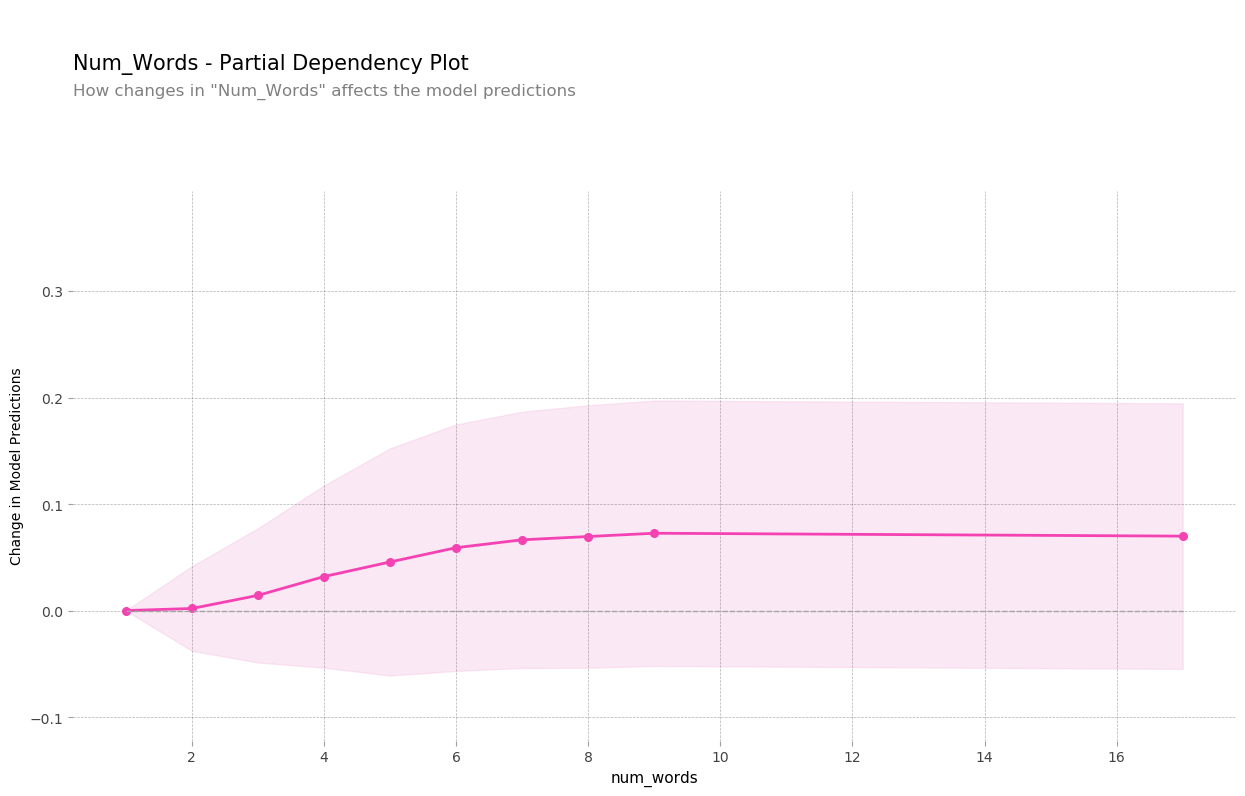

In [ ]:
def _plot_pdp(feature, pdp_color, fill_color):
    plot_params = {
        'title': feature.title() + ' - Partial Dependency Plot',
        'title_fontsize': 15,
        'subtitle': 'How changes in "%s" affects the model predictions' % feature.title(),
        'subtitle_fontsize': 12,
        'font_family': 'Calibri',
        'xticks_rotation': 0,
        'line_cmap': 'cool',
        'zero_color': '#a2a5a0',
        'zero_linewidth': 1.0,
        'pdp_linewidth': 2.0,
        'fill_alpha': 0.25,
        'markersize': 5.5,
        'pdp_hl_color': 'green',
        'pdp_color': pdp_color,
        'fill_color': fill_color,

    }
    pdp_goals = pdp.pdp_isolate(model=model1, dataset=X_test1, model_features=X_test1.columns, feature=feature)
    pdp.pdp_plot(pdp_goals, feature, plot_params = plot_params)
    plt.ylabel("Change in Model Predictions");
    plt.show();
    
cols_of_interest = ['num_words', 'num_chars', 'syllable_count',
                    'duration', 'launched_month', 'launched_day',
                    'category_count', 'main_category_count']

_plot_pdp(cols_of_interest[0], "#f442b3", "#efaad6")

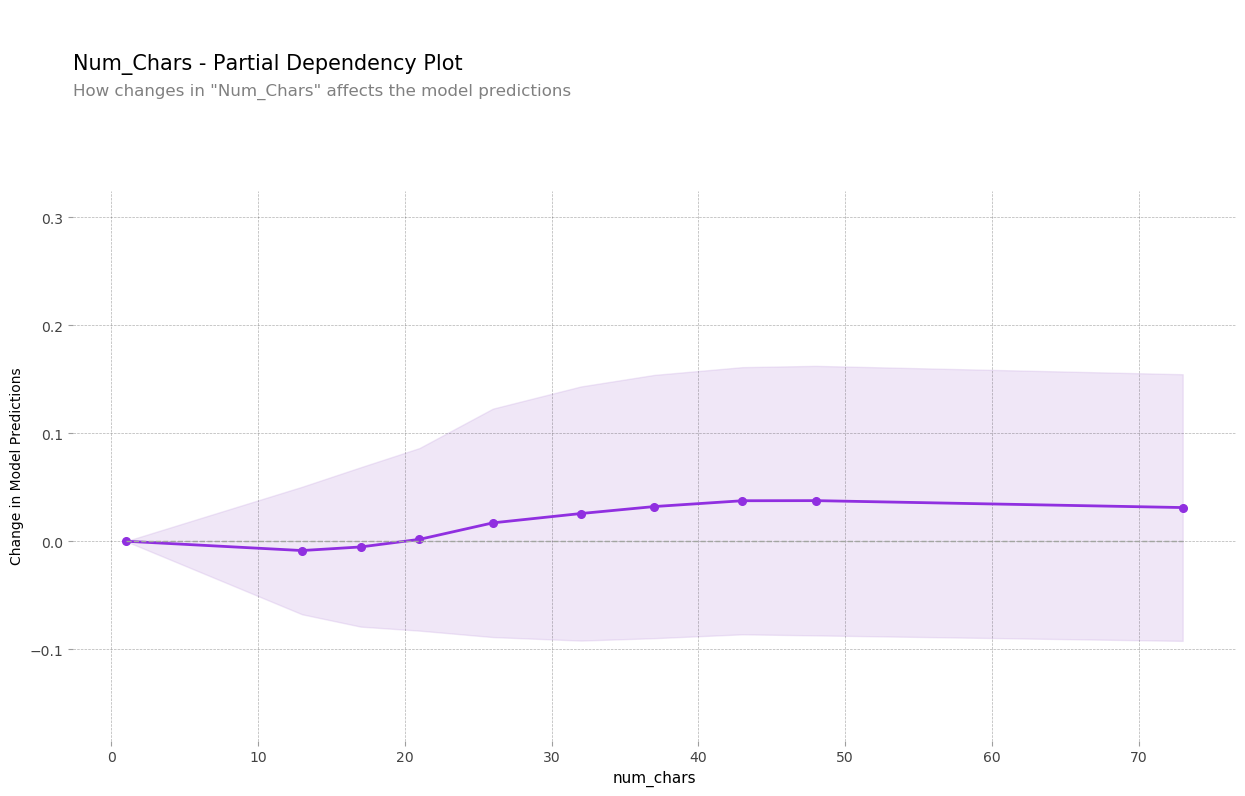

In [ ]:
_plot_pdp(cols_of_interest[1], "#902fe0", "#c4a1e0")


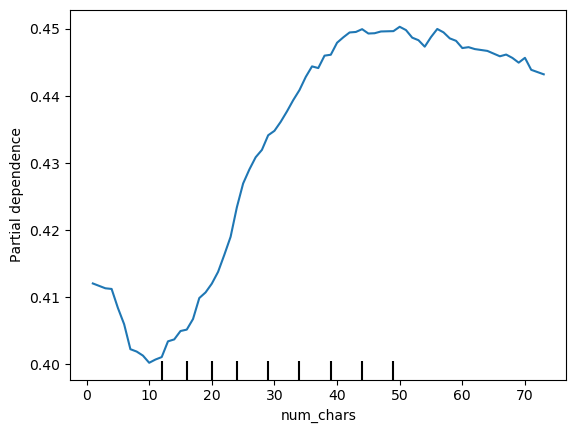

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(model1, X_test1,[cols_of_interest[1]])
plt.show()

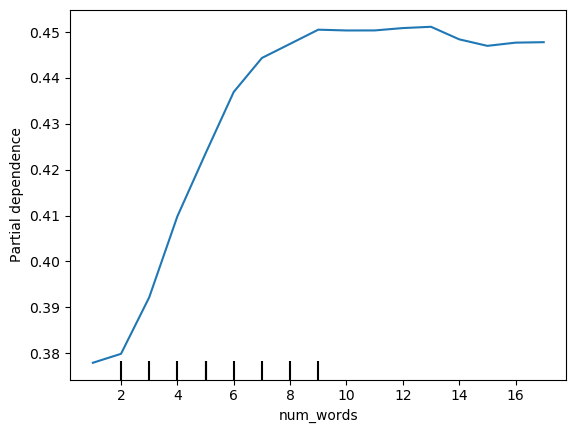

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(model1, X_test1,[cols_of_interest[0]])
plt.show()

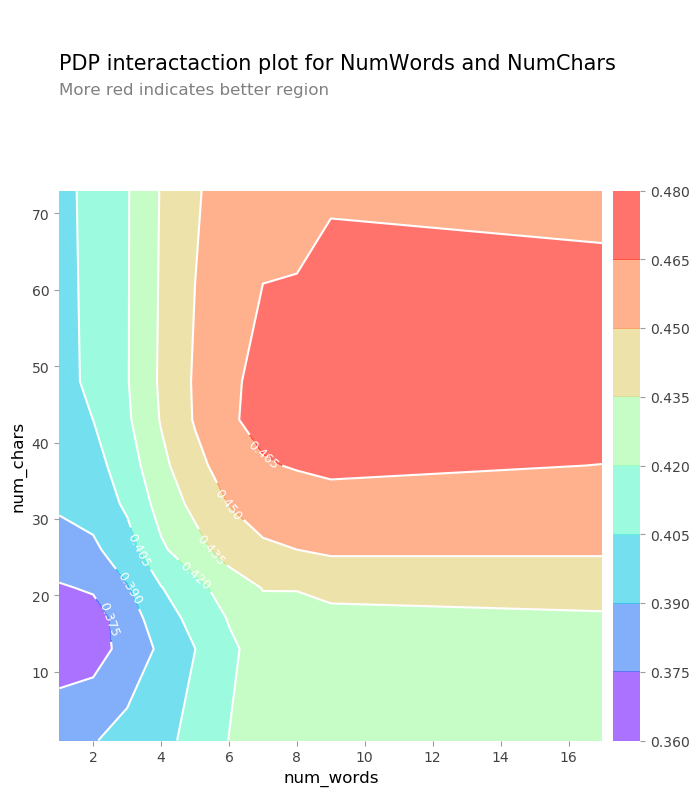

In [ ]:
features_to_plot = ['num_words', 'num_chars']
inter1 = pdp.pdp_interact(model1, X_test1, X_test1.columns, features_to_plot)

plot_params = {
    'title': 'PDP interactaction plot for NumWords and NumChars',
    'subtitle': 'More red indicates better region',
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'font_family': 'Calibri',
    'cmap': 'rainbow',
    'inter_fill_alpha': 0.6,
    'inter_fontsize': 9,
}

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour', plot_params = plot_params)
plt.show()

In [ ]:
xplot = X_test1[['category', 'main_category', 'goal', 'syllable_count', 'launched_month',
       'launched_week', 'launched_day', 'is_weekend', 'num_words', 'num_chars',
       'duration', 'Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
       'Film & Video', 'Food', 'Games', 'Journalism', 'Music', 'Photography',
       'Publishing', 'Technology', 'Theater', 'mean_category_goal',
       'category_count', 'mean_main_category_goal', 'main_category_count']]

In [ ]:
len(xplot.columns)

30

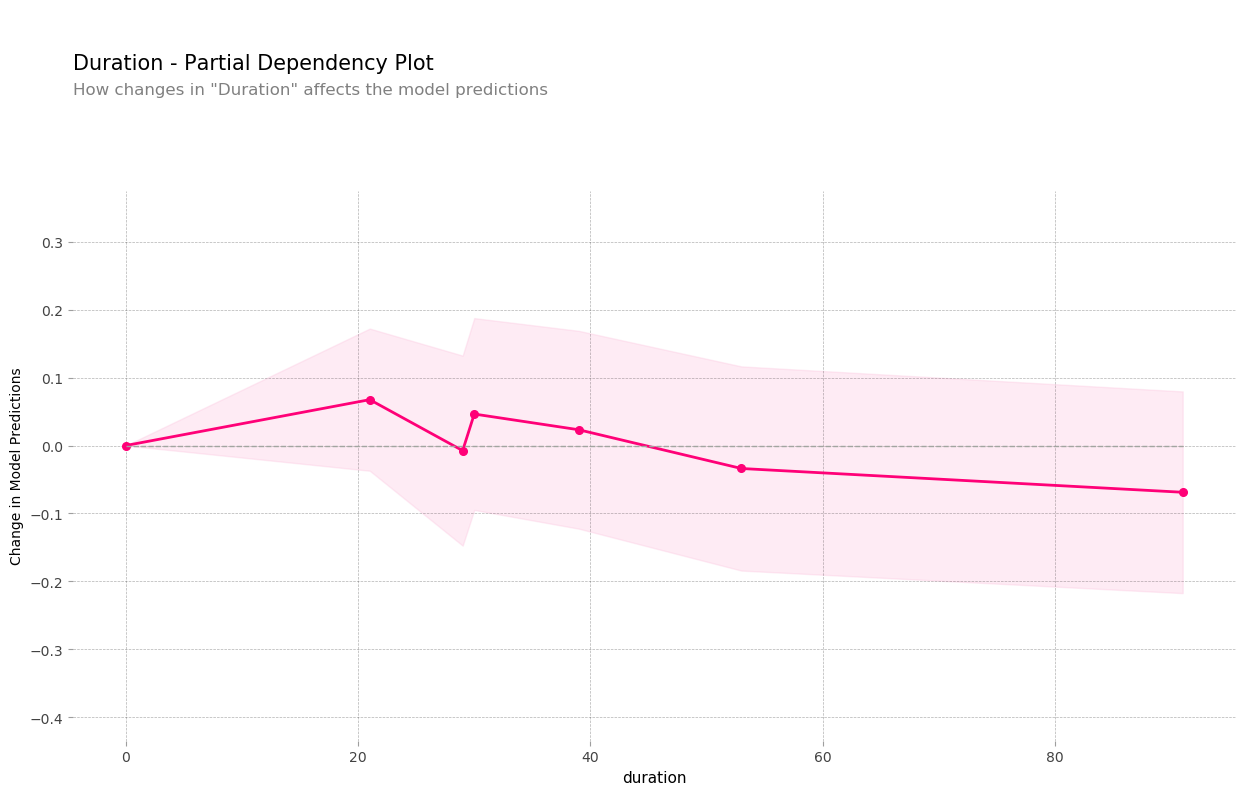

In [ ]:
_plot_pdp(cols_of_interest[3], "#ff0077", "#fcb3d5")


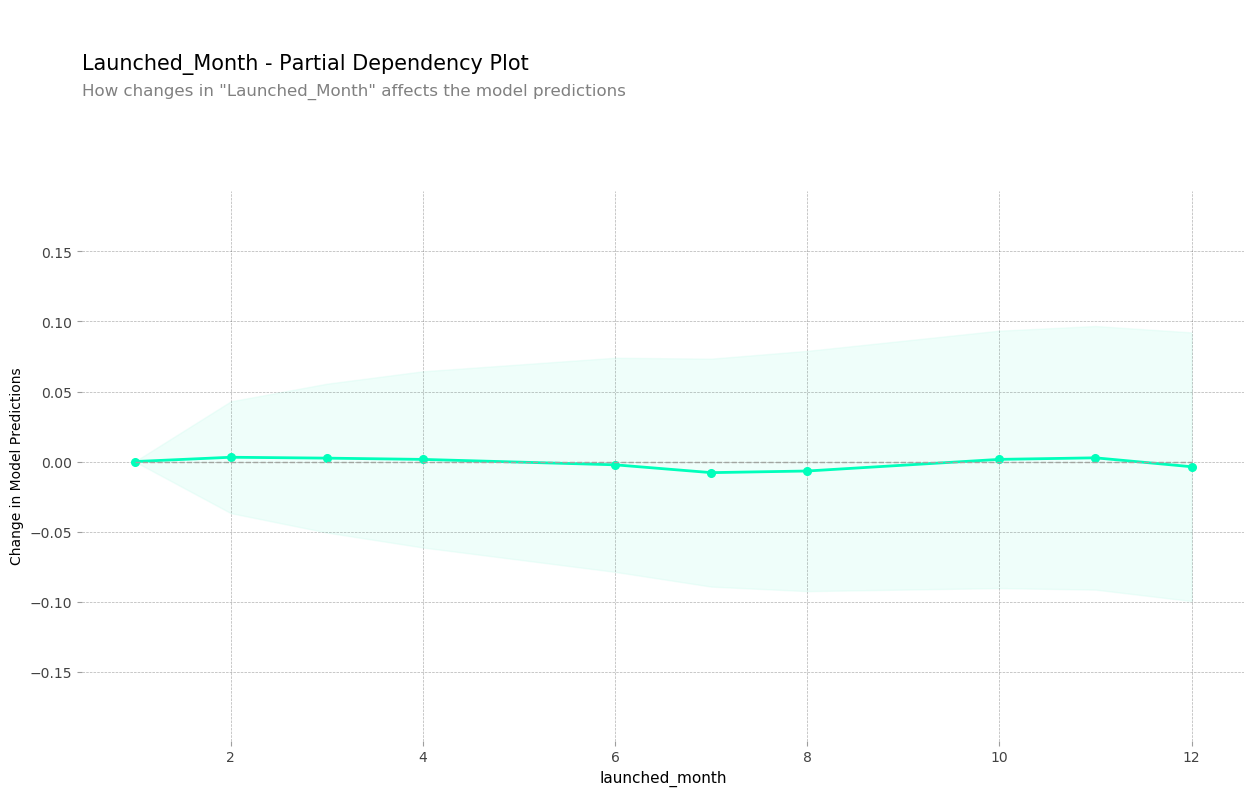

In [ ]:
_plot_pdp(cols_of_interest[4], "#00ffbb", "#c2fcec")
